In [1]:
import pandas as pd

In [28]:
import seaborn as sns

In [104]:
from sklearn.model_selection import train_test_split

In [120]:
import matplotlib.pyplot as plt

In [83]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [84]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<AxesSubplot:>

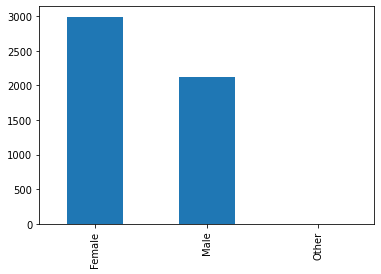

In [21]:
df['gender'].value_counts().plot(kind='bar')
#df['hypertension'].value_counts().plot(kind='bar')
#df['hypertension'].value_counts().plot(kind='bar')
#df['heart_disease'].value_counts().plot(kind='bar')
#df['ever_married'].value_counts().plot(kind='bar')
#df['work_type'].value_counts().plot(kind='bar')
#df['Residence_type'].value_counts().plot(kind='bar')
#df['smoking_status'].value_counts().plot(kind='bar')

<AxesSubplot:>

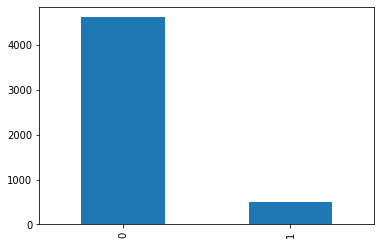

In [15]:
df['hypertension'].value_counts().plot(kind='bar')

<AxesSubplot:>

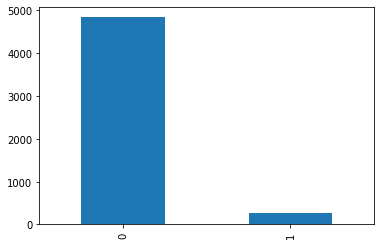

In [16]:
df['heart_disease'].value_counts().plot(kind='bar')

<AxesSubplot:>

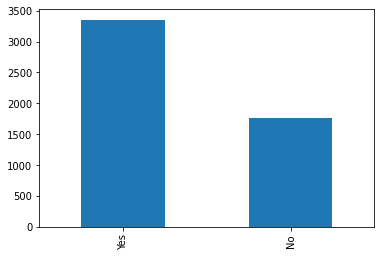

In [18]:
df['ever_married'].value_counts().plot(kind='bar')

<AxesSubplot:>

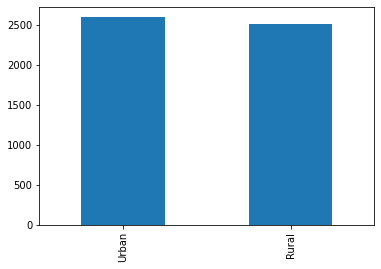

In [19]:
df['Residence_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

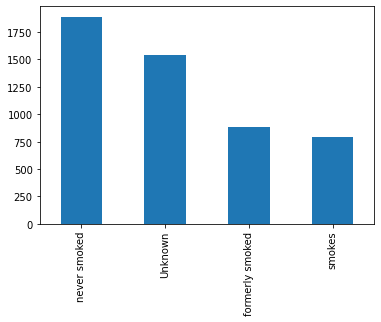

In [20]:
df['smoking_status'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

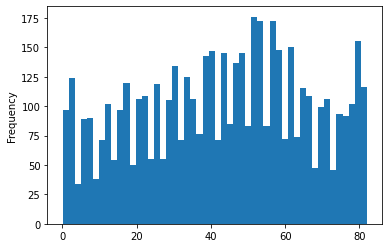

In [31]:
df['age'].plot(kind='hist',bins=50)

<AxesSubplot:ylabel='Frequency'>

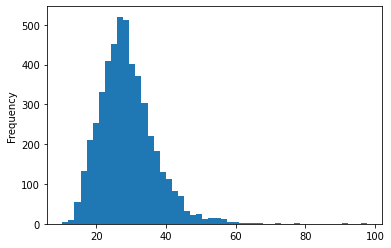

In [32]:
df['bmi'].plot(kind='hist',bins=50)

<AxesSubplot:ylabel='Frequency'>

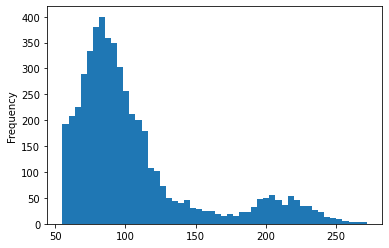

In [30]:
df['avg_glucose_level'].plot(kind='hist',bins=50)

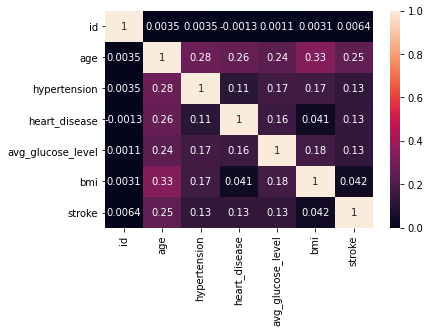

In [29]:
sns.heatmap(df.corr(), annot=True);

In [33]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [89]:
df=df.dropna()

In [35]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [51]:
df.loc[df['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [90]:
df = df.drop(labels=[3116], axis=0)

In [91]:

df['gender'] = df.iloc[:,1].astype('category').cat.codes
df['ever_married'] = df.iloc[:,5].astype('category').cat.codes
df['work_type'] = df.iloc[:,6].astype('category').cat.codes
df['Residence_type'] = df.iloc[:,7].astype('category').cat.codes
df['smoking_status'] = df.iloc[:,10].astype('category').cat.codes

In [92]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [85]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [76]:
df=df.iloc[:, 1:-1]

In [98]:
x = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [101]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4908, dtype: int64

In [102]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [105]:
train, test = train_test_split(df, test_size=0.2)

In [114]:
train_x = train.iloc[:, 1:-1]
train_y = train.iloc[:, -1]

In [117]:
test_x = test.iloc[:, 1:-1]
test_y = test.iloc[:, -1]

In [110]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(4, input_shape=(10,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [111]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 44        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
)

In [119]:
history = model.fit(train_x, train_y, 
                    epochs=5, 
                    validation_data=(test_x, test_y))

Epoch 1/5
123/123 [==============================] - 0s 4ms/step - loss: 0.1443 - acc: 0.9585 - val_loss: 0.1659 - val_acc: 0.9532
Epoch 2/5
123/123 [==============================] - 0s 4ms/step - loss: 0.1414 - acc: 0.9585 - val_loss: 0.1816 - val_acc: 0.9532
Epoch 3/5
123/123 [==============================] - 0s 4ms/step - loss: 0.1417 - acc: 0.9585 - val_loss: 0.1678 - val_acc: 0.9532
Epoch 4/5
123/123 [==============================] - 0s 3ms/step - loss: 0.1412 - acc: 0.9585 - val_loss: 0.1761 - val_acc: 0.9532
Epoch 5/5
123/123 [==============================] - 0s 4ms/step - loss: 0.1426 - acc: 0.9585 - val_loss: 0.1683 - val_acc: 0.9532


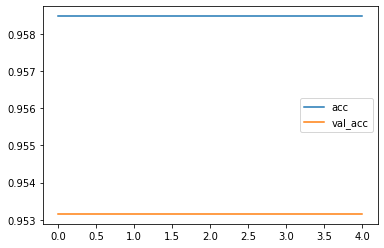

In [121]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()